In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
datas=pd.read_csv("diabetes.csv")
datas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
datas.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
datas.shape


(768, 9)

In [5]:
datsa.duplicates().sum()


NameError: name 'datsa' is not defined

In [6]:
datas.duplicates().sum()


AttributeError: 'DataFrame' object has no attribute 'duplicates'

In [7]:
datas.duplicated().sum()

0

In [8]:
datas.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
datas.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#how to handle warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


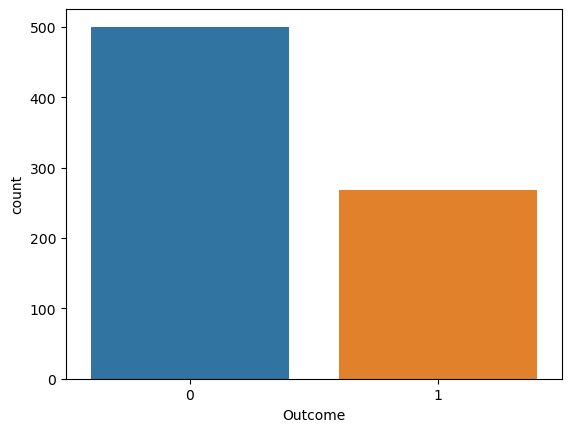

In [12]:
#drawing count plot for the target variable
sns.countplot(datas, x='Outcome');

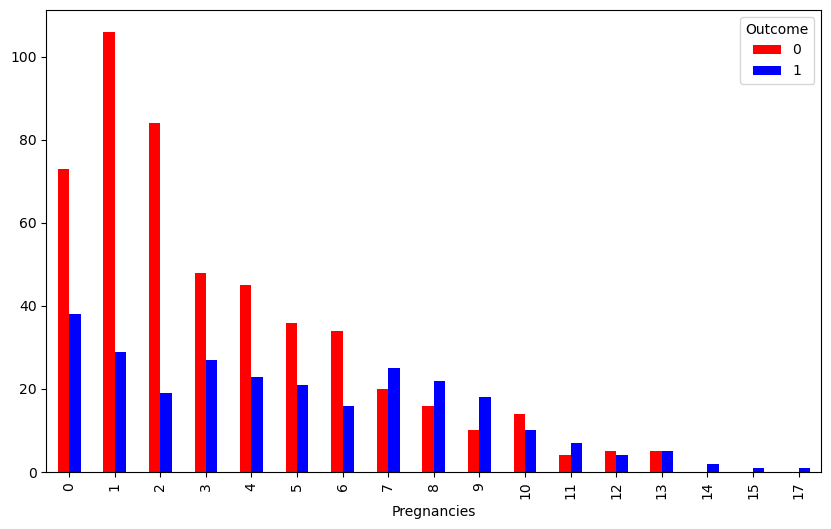

In [13]:
#creating a plot
pd.crosstab(datas.Pregnancies,datas.Outcome).plot(kind="bar",figsize=(10,6),color=['red','blue']);

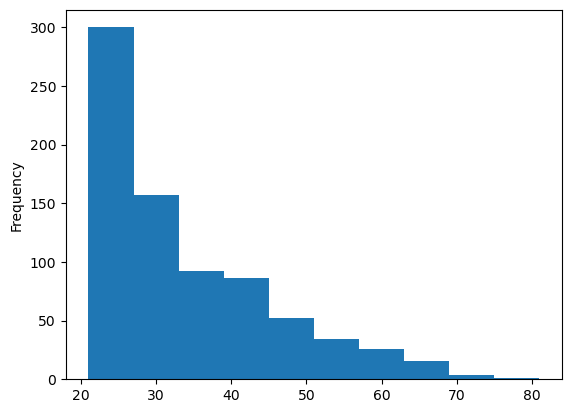

In [14]:
datas.Age.plot.hist();

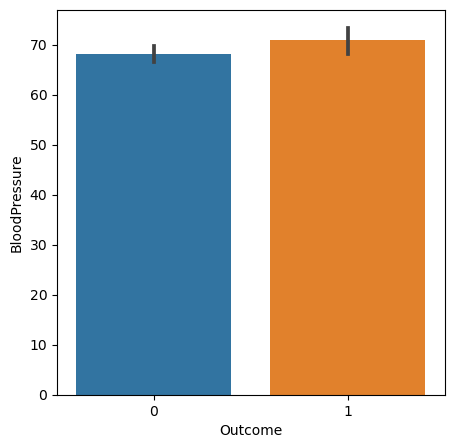

In [15]:
#more analysis for more understanding
#people who have diabetes are likely to have bloodpressure
plot=plt.figure(figsize=(5,5))
sns.barplot(x="Outcome",y="BloodPressure",data=datas);

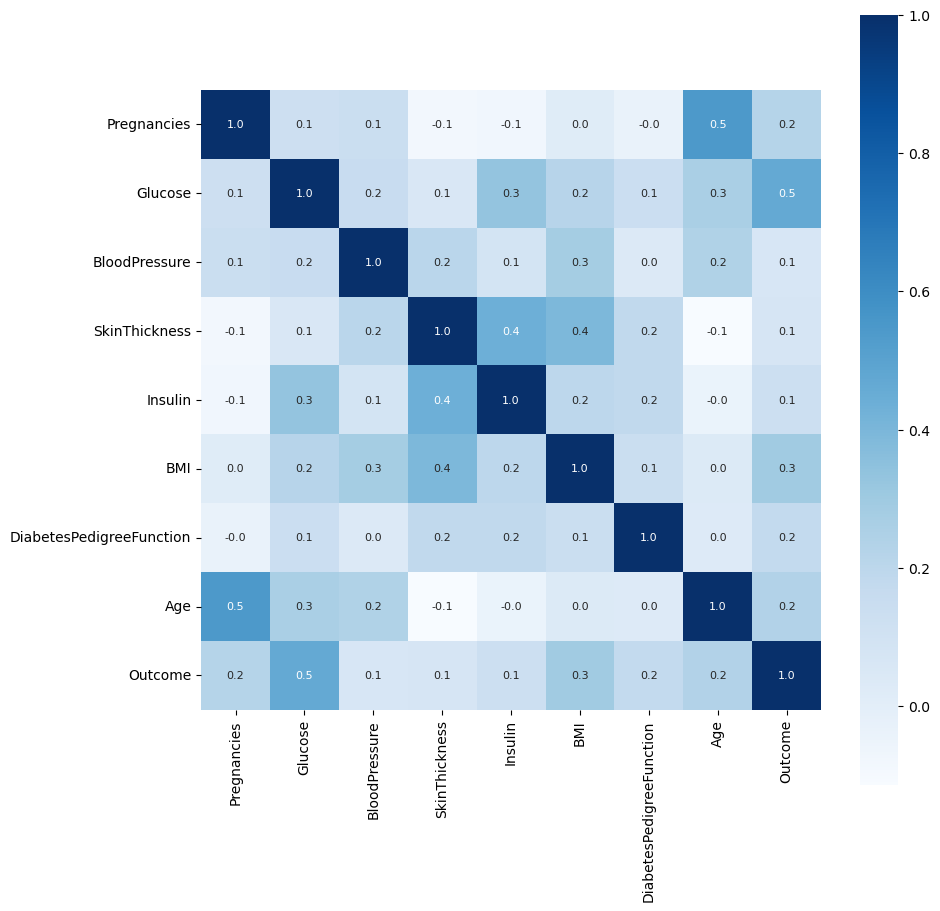

In [16]:
correlation=datas.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8},cmap='Blues');

In [17]:
datas.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [18]:
x=datas[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=datas[['Outcome']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
print(x_train.shape,y_train.shape,y_test.shape)

(614, 8) (614, 1) (154, 1)


In [20]:
from sklearn.impute import SimpleImputer
fill_values= SimpleImputer(missing_values=0,strategy='mean')
x_train=fill_values.fit_transform(x_train)
x_test=fill_values.fit_transform(x_test)

In [22]:
cl= RandomForestClassifier()

In [23]:
cl.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
pred=cl.predict(x_test)
test=accuracy_score(pred,y_test)
print(test)

0.7337662337662337


In [25]:
clf = SVC()
clf.fit(x_train, y_train)
svm_pred = clf.predict(x_test)
acc = accuracy_score(svm_pred, y_test)
class_report = classification_report(svm_pred, y_test)

In [26]:
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       122
           1       0.47      0.66      0.55        32

    accuracy                           0.77       154
   macro avg       0.68      0.73      0.70       154
weighted avg       0.81      0.77      0.79       154



In [27]:
#number of trees in random forest
n_estimators=[10,20,30]
max_depth=[3,4,5]

In [28]:
param_grid={'n_estimators':n_estimators,
           "max_depth":max_depth
             }
print(param_grid)

{'n_estimators': [10, 20, 30], 'max_depth': [3, 4, 5]}


In [29]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=cl,param_grid=param_grid,cv=10,verbose=2,n_jobs=4)

In [30]:
rf_grid.fit(x_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/victor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [3, 4, 5], 'n_estimators': [10, 20, 30]},
             verbose=2)

In [31]:
rf_grid.best_params_

{'max_depth': 3, 'n_estimators': 10}

In [32]:
cl.fit(x_train,y_train)

RandomForestClassifier()

train accuracy-:0.793160
test accuracy-:0.772727


In [38]:
param_grid = {'C': [1, 10], 'gamma': [0.1,'scale', 'auto'], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_svc = grid_search.best_estimator_
svm_pred = best_svc.predict(x_test)
print(classification_report(svm_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       119
           1       0.49      0.63      0.55        35

    accuracy                           0.77       154
   macro avg       0.68      0.72      0.70       154
weighted avg       0.79      0.77      0.78       154



In [39]:
from flask import Flask, render_template, request

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (inotify)
Traceback (most recent call last):
  File "/home/victor/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 15, in <module>
    from ipykernel import kernelapp as app
  File "/home/victor/anaconda3/lib/python3.11/site-packages/ipykernel/__init__.py", line 5, in <module>
    from .connect import *  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^
  File "/home/victor/anaconda3/lib/python3.11/site-packages/ipykernel/connect.py", line 11, in <module>
    import jupyter_client
  File "/home/victor/anaconda3/lib/python3.11/site-packages/jupyter_client/__init__.py", line 8, in <module>
    from .asynchronous import AsyncKernelClient  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/victor/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchronous/__init__.py", line 1, in <module>
    from .client import AsyncKernelClient  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

SystemExit: 1